Using least squares fit, estimated transition onset time is year 399.02388544967533 and estimated transition duration is 48.97611455039213 years.


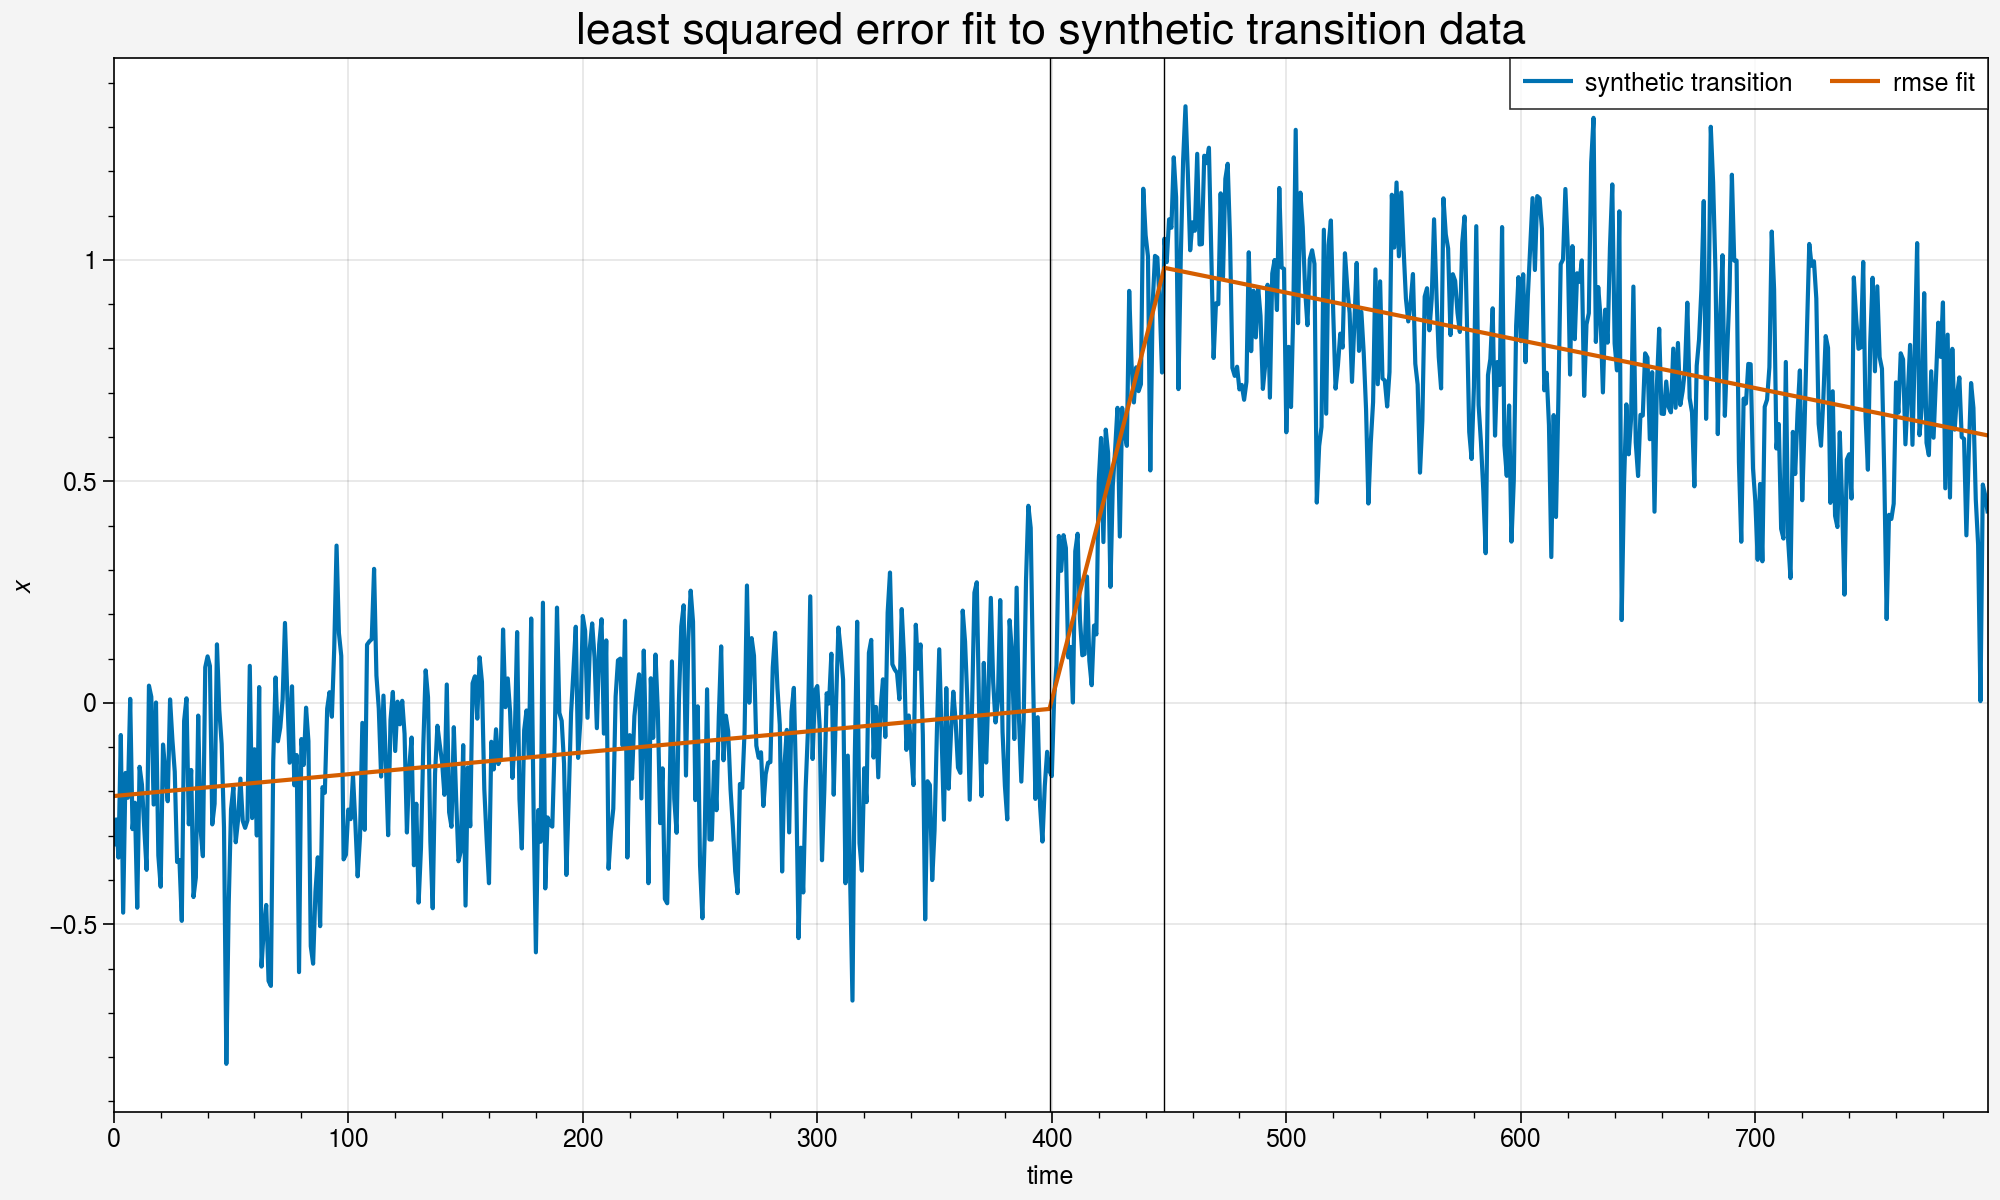

In [1]:
import numpy as np
import proplot as pplt
import pandas as pd
import os
import sys
sys.path.append(os.path.join(sys.path[0],'Original_Method'))
sys.path.append(os.path.join(sys.path[0],'Extended_Method'))
from model import linear_ramp, fit_rmse
from distributions import sample_ar1
from transition_characterization import estimate_transition, combined_transition
from transition_characterization_flat import estimate_transition_flat, combined_transition_flat

#################################################################
# create synthetic transition                                   #
#################################################################

'''We use the linear ramp function from file model.py and the sample_ar1 function from file
distributions.py (in folder Extended_Method) to create a synthetic transition which we use
to demonstrate the two implementations of the ramp fitting method.'''

delta = 1.0 #Temporal resolution in years
t0 = 400.0 #Year of transition onset
dt = 50.0 #Transition duration in years
dy = 1.0 #Magnitude of Transition
GS_slope = 5e-4 #Slope during stadial preceding transition in years^-1
GIS_slope = -1e-3 #Slope during interstadial following transition in years^-1
sigma = 0.2 #Variance of AR1 noise
tau = 1.0 #Autocorrelation time of AR1 noise in years

alpha = np.exp(-delta/tau)
time = np.arange(800,step=delta,dtype='float')
trans = linear_ramp(time, t0=t0, dt=dt, y0=0.0, dy = 1.0, GS_slope = GS_slope, GIS_slope = GIS_slope)
noise = sample_ar1(len(time), alpha=alpha, sigma=sigma, x0=0)
synt_trans = trans + noise
#################################################################
# least squares fit of a linear ramp model to the noisy data    #
#################################################################

'''We first perform a simple least squares fit to this synthetic transition.'''

popt = fit_rmse(time, synt_trans)
cntrl = linear_ramp(time, t0=popt[0], dt=np.exp(popt[1]),
                    y0=popt[2], dy=popt[3], GS_slope=popt[4], GIS_slope=popt[5])
print('Using least squares fit, estimated transition onset time is year \
'+str(popt[0])+' and estimated \
transition duration is '+str(np.exp(popt[1]))+' years.')

fig = pplt.figure(figsize=(10,6))
ax = fig.add_subplot()
ax.plot(time, synt_trans, color='C0', label='synthetic transition')
ax.plot(time, cntrl, color='C1', label='rmse fit')
ax.axvline(popt[0], color='k', lw=0.5)
ax.axvline(popt[0] + np.exp(popt[1]), color='k', lw=0.5)
ax.set_xlabel('time')
ax.set_ylabel('$x$')
ax.legend()
ax.set_title('least squared error fit to synthetic transition data', fontsize=16)
fig.show()

Using original Bayesian method, mean estimated transition onset time is year 391.93086232217945 and mean estimated transition duration is 48.580308581979274 years.
Mean acceptance fraction of the MCMC sampler is 0.50356


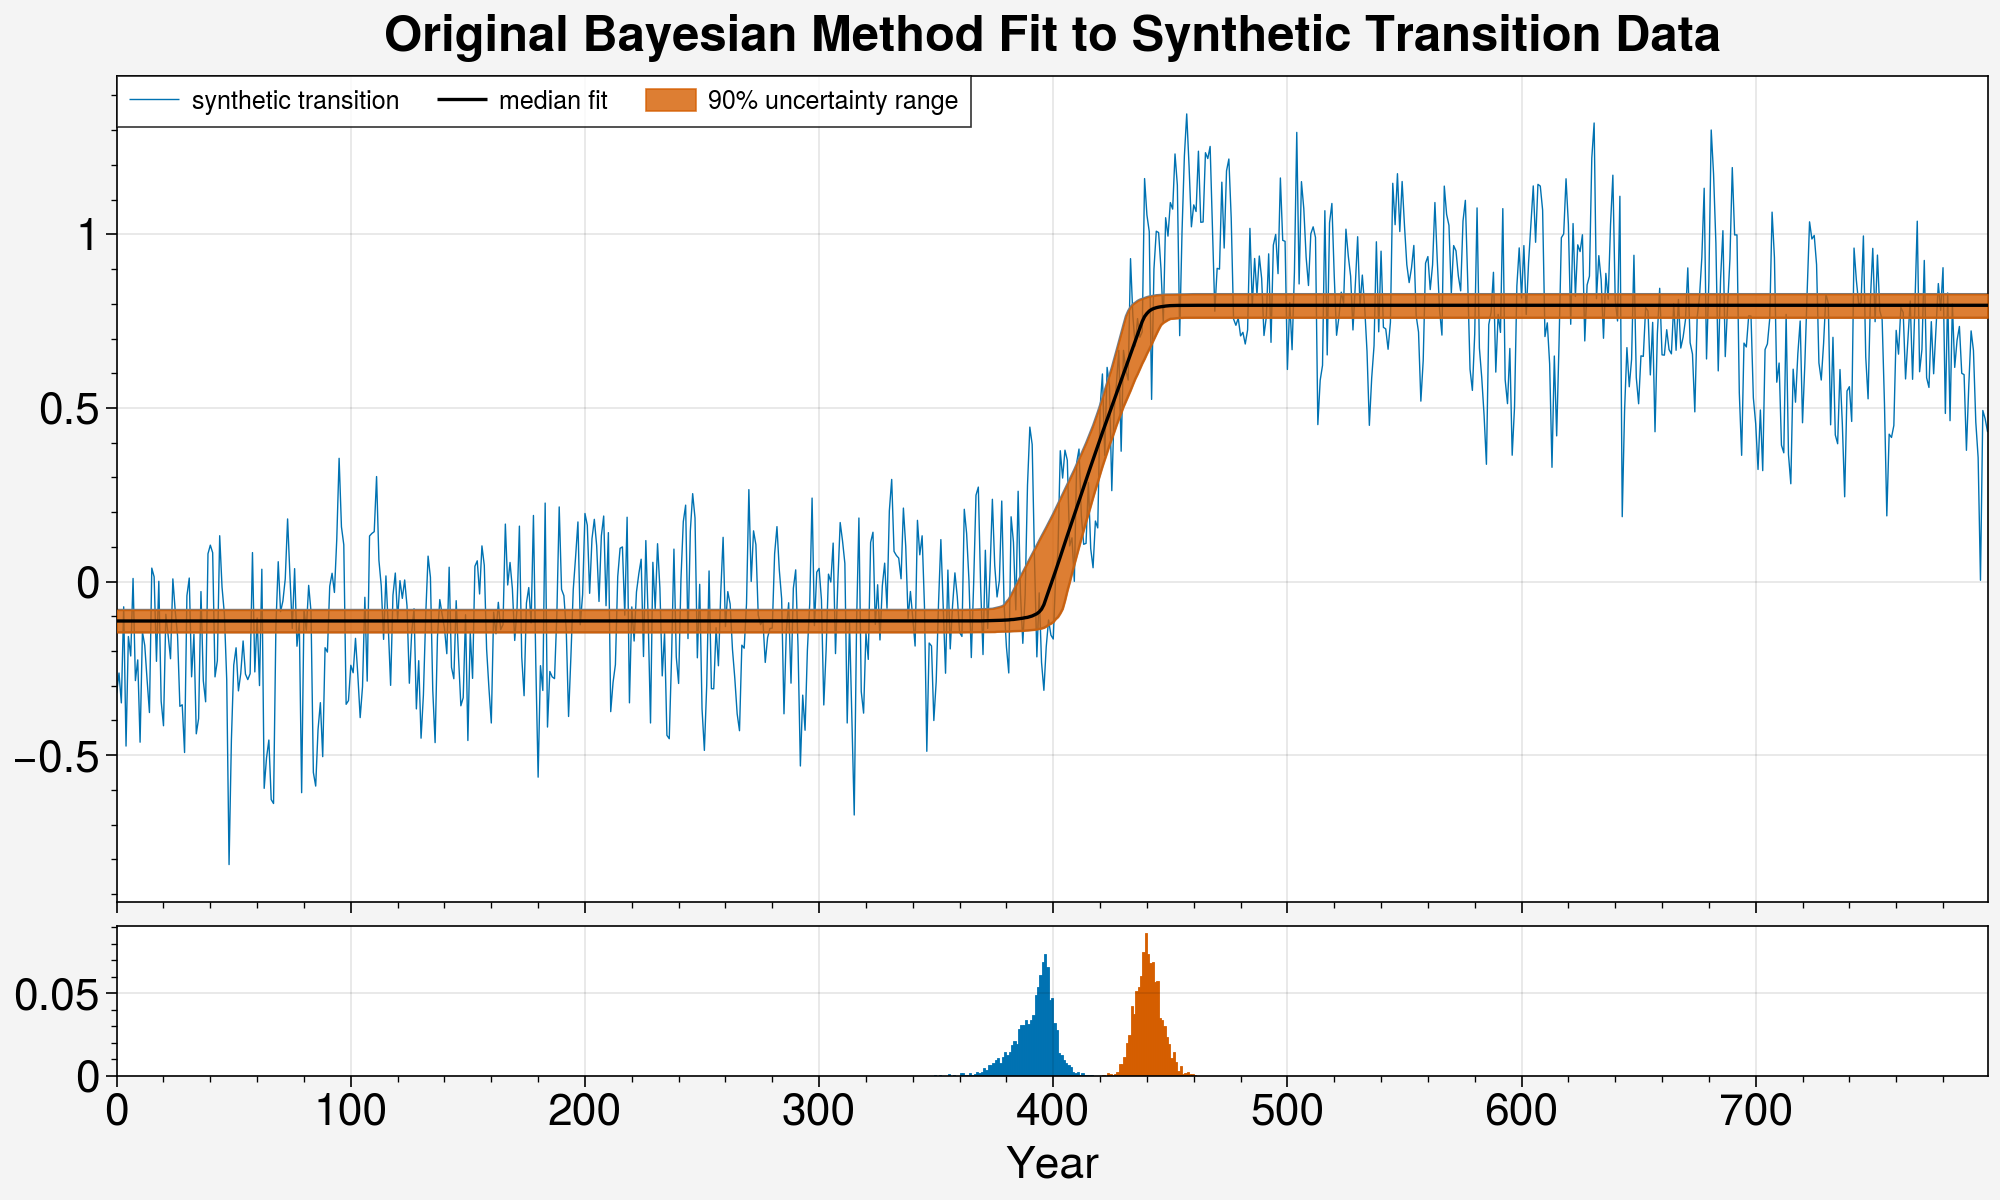

In [2]:
#################################################################
# characterize the transition with the original Bayesian method #
# without specification of an initial parameter guess           #
#################################################################

traces, int_tau, accept_frac = estimate_transition_flat(time, synt_trans, nwalkers=20, nsamples=20000, nthin=200, nburnin=1000)
print('Using original Bayesian method, mean estimated transition onset time is year \
'+str(np.mean(traces['t0']))+' and mean estimated \
transition duration is '+str(np.mean(traces['dt']))+' years.')
print('Mean acceptance fraction of the MCMC sampler is '+str(accept_frac))

fig = pplt.figure(figsize=(10,6))
ax = fig.add_subplot()

fig.format(xlabel='Year', fontsize=16,
    suptitle='Original Bayesian Method Fit to Synthetic Transition Data',
    titleloc='uc', titleabove=False)

p5, p50, p95 = combined_transition_flat(time, traces)


ax.plot(time, synt_trans, lw=0.5, label='synthetic transition')
ax.plot(time, p50, color='k', lw=1.2, label='median fit', zorder=12)
ax.plot(time, p5, color='slategray', lw=0.8)
ax.plot(time, p95, color='slategray',  lw=0.8)
ax.fill_between(x=time, y1=p5, y2=p95, color='C1', alpha=.8, zorder=10, label='90% uncertainty range')

px = ax.panel_axes("b", width='6em', share=True)
px.format(fontsize=16)
px.hist(traces['t0'].values, bins=np.arange(790), density=True, label='onset time')
px.hist(traces['t0'].values + traces['dt'].values, bins=np.arange(790), density=True, label='end time')
ax.legend()
fig.show()

Using extended Bayesian method, mean estimated transition onset time is year 399.4524224933743  and mean estimated transition duration is 48.502107186641865 years.
Mean acceptance fraction of the MCMC sampler is 0.45768249999999994


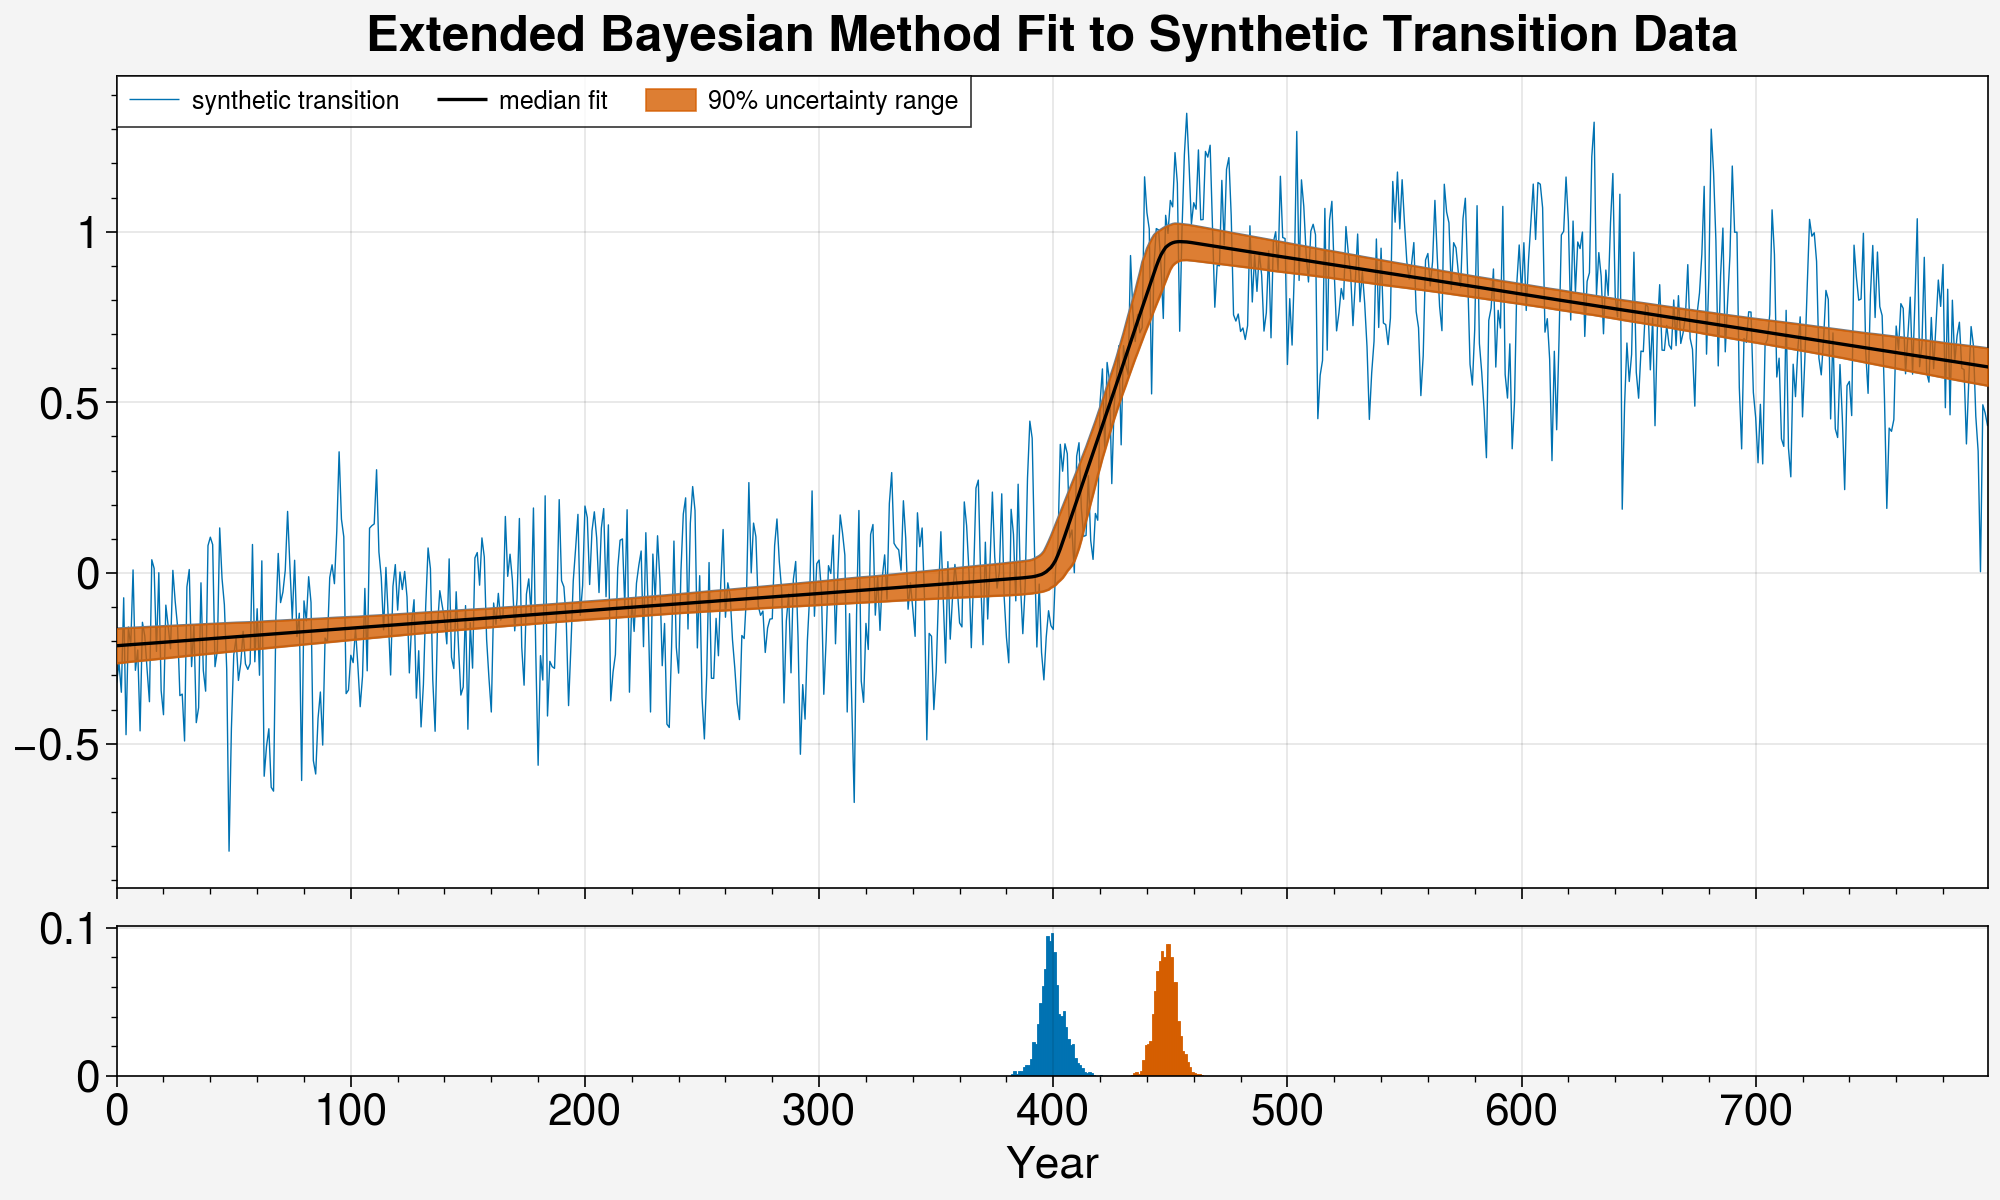

In [4]:
#################################################################
# characterize the transition with the extended Bayesian method #
# without specification of an initial parameter guess           #
#################################################################

traces, int_tau, accept_frac = estimate_transition(time, synt_trans, nwalkers=20, nsamples=20000, nthin=200, nburnin=1000)
print('Using extended Bayesian method, mean estimated transition onset time is year \
'+str(np.mean(traces['t0']))+' and mean estimated \
transition duration is '+str(np.mean(traces['dt']))+' years.')
print('Mean acceptance fraction of the MCMC sampler is '+str(accept_frac))

fig = pplt.figure(figsize=(10,6))
ax = fig.add_subplot()

fig.format(xlabel='Year', fontsize=16,
    suptitle='Extended Bayesian Method Fit to Synthetic Transition Data',
    titleloc='uc', titleabove=False)

p5, p50, p95 = combined_transition(time, traces)


ax.plot(time, synt_trans, lw=0.5, label='synthetic transition')
ax.plot(time, p50, color='k', lw=1.2, label='median fit', zorder=12)
ax.plot(time, p5, color='slategray', lw=0.8)
ax.plot(time, p95, color='slategray',  lw=0.8)
ax.fill_between(x=time, y1=p5, y2=p95, color='C1', alpha=.8, zorder=10, label='90% uncertainty range')

px = ax.panel_axes("b", width='6em', share=True)
px.format(fontsize=16)
px.hist(traces['t0'].values, bins=np.arange(790), density=True, label='onset time')
px.hist(traces['t0'].values + traces['dt'].values, bins=np.arange(790), density=True, label='end time')
ax.legend()
fig.show()